# Import Libraries

In [67]:
import sys
import os

# Add the parent directory to the path
sys.path.append(os.path.abspath('..'))

In [ ]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import wilcoxon
from itertools import combinations

from evolution.entities import Population, Individual

from evolution.selection import fitness_proportionate_selection, ranking_selection, tournament_selection
from evolution.crossover import pmx_crossover, fitness_based_slot_crossover
from evolution.mutation import n_swap_mutation, scramble_mutation, prime_slot_swap_mutation, preserve_best_slots_mutation

from evolution.algorithm import genetic_algorithm
from evolution.hill_climbing import *
from evolution.simulated_annealing import *

In [69]:
sns.set_theme(style="whitegrid", font_scale=1.2)

# Create Results DataFrame

In [70]:
# Load the results from the CSV file
results_1 = pd.read_csv('results/config1_results.csv')
results_2 = pd.read_csv('results/config2_results_1.csv')

# Concatenate them
results = pd.concat([results_1, results_2], ignore_index=True)

In [71]:
results

,Selection,Crossover,Mutation,Run,Gens_Best_Fitness
0,fitness_proportionate_selection,pmx_crossover,n_swap_mutation,1,"[0.4343359412730609, 0.4886110306191442, 0.488..."
1,fitness_proportionate_selection,pmx_crossover,n_swap_mutation,2,"[0.4294412247657684, 0.4294412247657684, 0.429..."
2,fitness_proportionate_selection,pmx_crossover,n_swap_mutation,3,"[0.4174785086448372, 0.4174785086448372, 0.417..."
3,fitness_proportionate_selection,pmx_crossover,n_swap_mutation,4,"[0.42088814836279337, 0.42088814836279337, 0.4..."
4,fitness_proportionate_selection,pmx_crossover,n_swap_mutation,5,"[0.4407751376412634, 0.4407751376412634, 0.442..."
5,fitness_proportionate_selection,pmx_crossover,n_swap_mutation,6,"[0.42844924176567173, 0.44606828938471943, 0.4..."
6,fitness_proportionate_selection,pmx_crossover,n_swap_mutation,7,"[0.4426692746063943, 0.45209697672172316, 0.45..."
7,fitness_proportionate_selection,pmx_crossover,n_swap_mutation,8,"[0.41946102578962624, 0.42881387037573643, 0.4..."
8,fitness_proportionate_selection,pmx_crossover,n_swap_mutation,9,"[0.4145542354872984, 0.42891625615763546, 0.42..."
9,fitness_proportionate_selection,pmx_crossover,n_swap_mutation,10,"[0.41510673234811163, 0.41510673234811163, 0.4..."


In [72]:
# Create a unique configuration name
results['Config'] = results['Selection'] + '_' + results['Crossover'] + '_' + results['Mutation']

# Prepare the dictionary
fitness_dfs = {}

# Group by config and build the DataFrames
for config_name, group in results.groupby('Config'):
    all_runs = []
    
    for fitness_json in group['Gens_Best_Fitness']:
        # Parse the fitness list
        fitness_list = json.loads(fitness_json)
        all_runs.append(fitness_list)

    # Convert to DataFrame: rows=runs, columns=generations
    fitness_results = pd.DataFrame(all_runs)

    fitness_dfs[config_name] = fitness_results

In [73]:
fitness_dfs["fitness_proportionate_selection_pmx_crossover_n_swap_mutation"]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.434336,0.488611,0.488611,0.488611,0.488611,0.495516,0.495516,0.495516,0.495516,0.495516,...,0.527248,0.534315,0.534315,0.534315,0.534315,0.534315,0.534315,0.534315,0.534315,0.534315
1,0.429441,0.429441,0.429927,0.433431,0.433431,0.433431,0.437233,0.437233,0.437233,0.438086,...,0.513715,0.513715,0.513715,0.513715,0.513715,0.513715,0.513715,0.513715,0.513715,0.513715
2,0.417479,0.417479,0.417479,0.425003,0.431116,0.434092,0.434092,0.442726,0.442726,0.445288,...,0.503829,0.503829,0.503829,0.503829,0.503829,0.503829,0.503829,0.503829,0.503829,0.503829
3,0.420888,0.420888,0.421841,0.429708,0.449460,0.449460,0.449460,0.449460,0.449460,0.454496,...,0.517877,0.517877,0.517877,0.517877,0.517877,0.517877,0.517877,0.517877,0.517877,0.522639
4,0.440775,0.440775,0.442431,0.442431,0.442431,0.453535,0.456268,0.456268,0.456268,0.456268,...,0.502524,0.502524,0.502524,0.502524,0.502524,0.502524,0.502524,0.502524,0.502524,0.502524
5,0.428449,0.446068,0.446068,0.446068,0.446068,0.446068,0.446068,0.456068,0.456068,0.456068,...,0.489544,0.489544,0.489544,0.489544,0.489544,0.489544,0.489544,0.489544,0.489544,0.489544
6,0.442669,0.452097,0.452097,0.452097,0.458049,0.458049,0.458049,0.460201,0.460201,0.460201,...,0.495639,0.495639,0.495639,0.495639,0.495639,0.495639,0.495639,0.495639,0.495639,0.495639
7,0.419461,0.428814,0.428814,0.428814,0.428814,0.428814,0.428814,0.428814,0.429766,0.442242,...,0.502450,0.502450,0.502450,0.502450,0.502450,0.511706,0.511706,0.511706,0.511706,0.511706
8,0.414554,0.428916,0.428916,0.434594,0.434594,0.434594,0.434594,0.434594,0.434594,0.434594,...,0.484629,0.484629,0.484629,0.484629,0.484629,0.484629,0.484629,0.484629,0.484629,0.484629
9,0.415107,0.415107,0.425984,0.425984,0.425984,0.425984,0.425984,0.425984,0.425984,0.435783,...,0.487210,0.487210,0.487210,0.487210,0.487210,0.487210,0.487210,0.487210,0.487210,0.487210


In [74]:
fitness_dfs["fitness_proportionate_selection_pmx_crossover_scramble_mutation"]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.418957,0.463039,0.463039,0.463039,0.463039,0.463039,0.463039,0.463039,0.463039,0.463039,...,0.502125,0.502125,0.502125,0.502125,0.502125,0.502125,0.502125,0.502125,0.502125,0.502125
1,0.404281,0.419643,0.419643,0.419643,0.419643,0.430049,0.430049,0.430049,0.430049,0.430049,...,0.489469,0.494707,0.494707,0.494707,0.494707,0.494707,0.494707,0.494707,0.494707,0.494707
2,0.430935,0.437364,0.437364,0.437364,0.437364,0.438165,0.462820,0.462820,0.462820,0.462820,...,0.477153,0.477153,0.477153,0.477153,0.485725,0.485725,0.485725,0.485725,0.485725,0.485725
3,0.403631,0.403631,0.410862,0.410862,0.419621,0.446288,0.446288,0.446288,0.448115,0.448115,...,0.505058,0.505058,0.505058,0.505058,0.505058,0.505058,0.505058,0.505058,0.505058,0.505058
4,0.405355,0.405355,0.432813,0.437527,0.442051,0.442051,0.444843,0.444843,0.460926,0.460926,...,0.476097,0.476097,0.476097,0.476097,0.476097,0.476097,0.476097,0.482288,0.482288,0.482288
5,0.438460,0.438460,0.438460,0.438460,0.450841,0.450841,0.451221,0.460001,0.460001,0.460001,...,0.510943,0.510943,0.510943,0.510943,0.510943,0.510943,0.510943,0.510943,0.510943,0.510943
6,0.403507,0.418309,0.418309,0.424859,0.424859,0.424859,0.424859,0.439507,0.441174,0.441174,...,0.517001,0.517001,0.517001,0.517001,0.517001,0.517001,0.517001,0.517001,0.517001,0.517001
7,0.415574,0.415574,0.415574,0.415574,0.415574,0.425411,0.425411,0.425411,0.425411,0.425411,...,0.493191,0.493191,0.493191,0.493191,0.493191,0.493191,0.493191,0.493191,0.493191,0.493191
8,0.399575,0.399575,0.437677,0.437677,0.462201,0.462201,0.462201,0.462201,0.462201,0.462201,...,0.513668,0.513668,0.513668,0.513668,0.513668,0.513668,0.513668,0.513668,0.513668,0.513668
9,0.435271,0.435271,0.435271,0.435271,0.449060,0.449060,0.449060,0.449060,0.449060,0.449060,...,0.509402,0.509402,0.509402,0.509402,0.509402,0.509402,0.509402,0.509402,0.509402,0.509402


# Configurations' Comparison

In [75]:
def plot_fitness_over_gen(fitness_dfs: dict[str, pd.DataFrame]):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    handles, labels = [], []

    for config_name, df in fitness_dfs.items():
        mean_fitness = df.mean(axis=0)
        median_fitness = df.median(axis=0)
        
        line1, = axes[0].plot(mean_fitness.index, mean_fitness.values, label=config_name)
        axes[1].plot(median_fitness.index, median_fitness.values, label=config_name)

        handles.append(line1)
        labels.append(config_name)

    axes[0].set_title("Mean Fitness Across Generations")
    axes[1].set_title("Median Fitness Across Generations")

    for ax in axes:
        ax.set_xlabel("Generation")
        ax.set_ylabel("Fitness")
        ax.grid(True)

    # Shared boxed legend below
    fig.legend(
        handles,
        labels,
        loc='lower center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=2,
        frameon=True,
        borderpad=1
    )

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.25)
    plt.show()

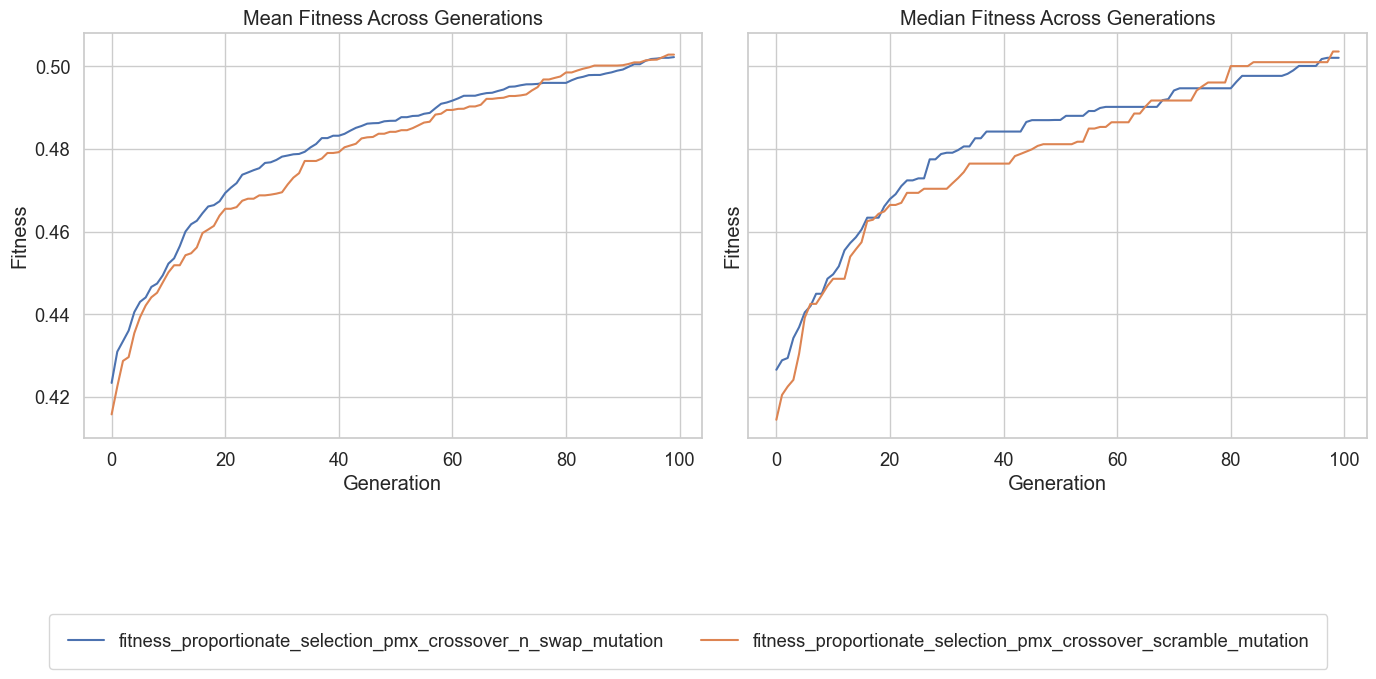

In [76]:
plot_fitness_over_gen(fitness_dfs)

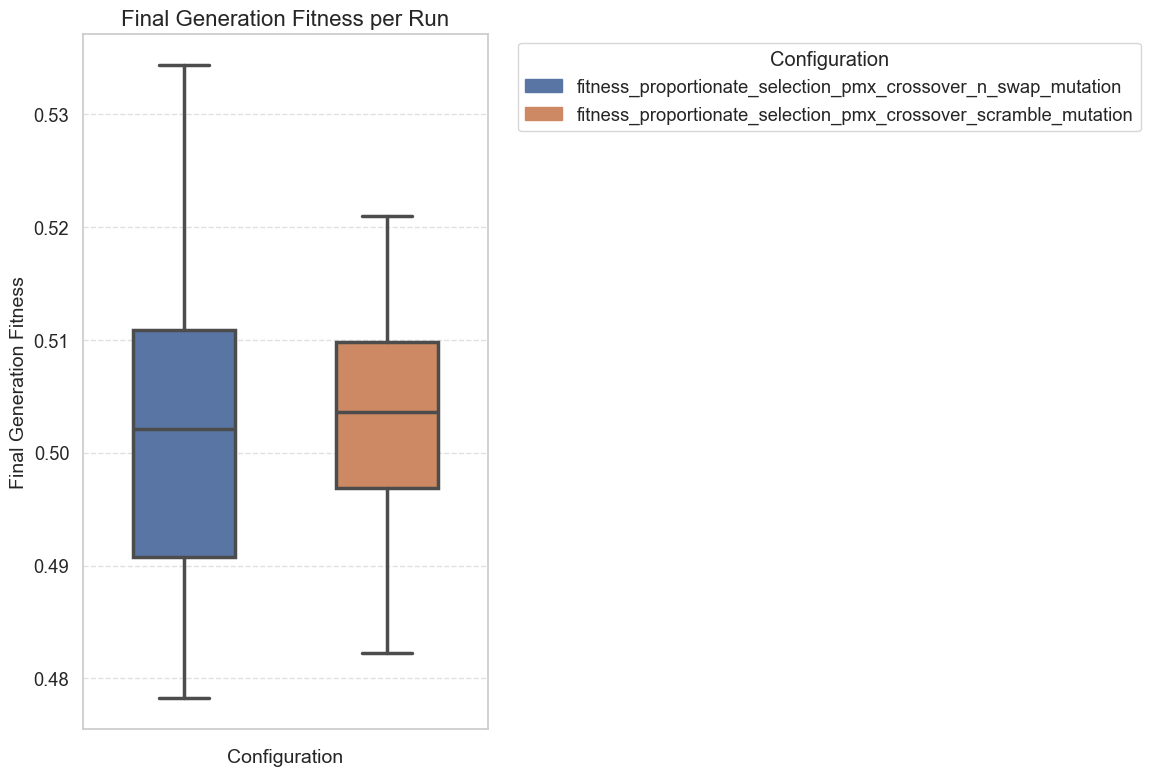

In [86]:
# Prepare long-format DataFrame
data = []
for config_label, df in fitness_dfs.items():
    final_gen_fitness = df.iloc[:, -1].values  # Fitness at final generation
    for value in final_gen_fitness:
        data.append({'value': value, 'group': config_label})
df_long = pd.DataFrame(data)

# Create the plot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='group', y='value', data=df_long, width=0.5, linewidth=2.5, fliersize=4)

# Labels and title
plt.title('Final Generation Fitness per Run', fontsize=16)
plt.ylabel('Final Generation Fitness', fontsize=14)
plt.xlabel('Configuration', fontsize=14)
ax.set_xticklabels([])  # Hide x-axis labels
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Extract box colors
unique_groups = df_long['group'].unique()
n_groups = len(unique_groups)
step = len(ax.patches) // n_groups
box_colors = [ax.patches[i * step].get_facecolor() for i in range(n_groups)]

# Build the legend
patches = [mpatches.Patch(color=box_colors[i], label=unique_groups[i]) for i in range(n_groups)]
plt.legend(handles=patches, title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Operators' Isolated Comparison

In [78]:
selection_names = ["fitness_proportionate_selection", "ranking_selection", "tournament_selection"]
crossover_names = ["pmx_crossover", "fitness_based_slot_crossover"]
mutation_names = ["n_swap_mutation", "scramble_mutation", "prime_slot_swap_mutation", "preserve_best_slots_mutation"]

## Approach 1 - Aggregate Raw Runs

Group all runs that use a particular hyperparameter value and compute the median best fitness across those runs.

In [79]:
selection_fit_dfs = {}
crossover_fit_dfs = {}
mutation_fit_dfs = {}

# Combine all isolated runs using a given selection
for selection_name in selection_names:
    dfs_to_concat = []
    for df_name, df in fitness_dfs.items():
        if selection_name in df_name:
            dfs_to_concat.append(df)
    if dfs_to_concat:
        selection_fit_dfs[selection_name] = pd.concat(dfs_to_concat, axis=0).reset_index(drop=True)

# Combine all isolated runs using a given crossover
for crossover_name in crossover_names:
    dfs_to_concat = []
    for df_name, df in fitness_dfs.items():
        if crossover_name in df_name:
            dfs_to_concat.append(df)
    if dfs_to_concat:
        crossover_fit_dfs[crossover_name] = pd.concat(dfs_to_concat, axis=0).reset_index(drop=True)

# Combine all isolated runs using a given mutation
for mutation_name in mutation_names:
    dfs_to_concat = []
    for df_name, df in fitness_dfs.items():
        if mutation_name in df_name:
            dfs_to_concat.append(df)
    if dfs_to_concat:
        mutation_fit_dfs[mutation_name] = pd.concat(dfs_to_concat, axis=0).reset_index(drop=True)

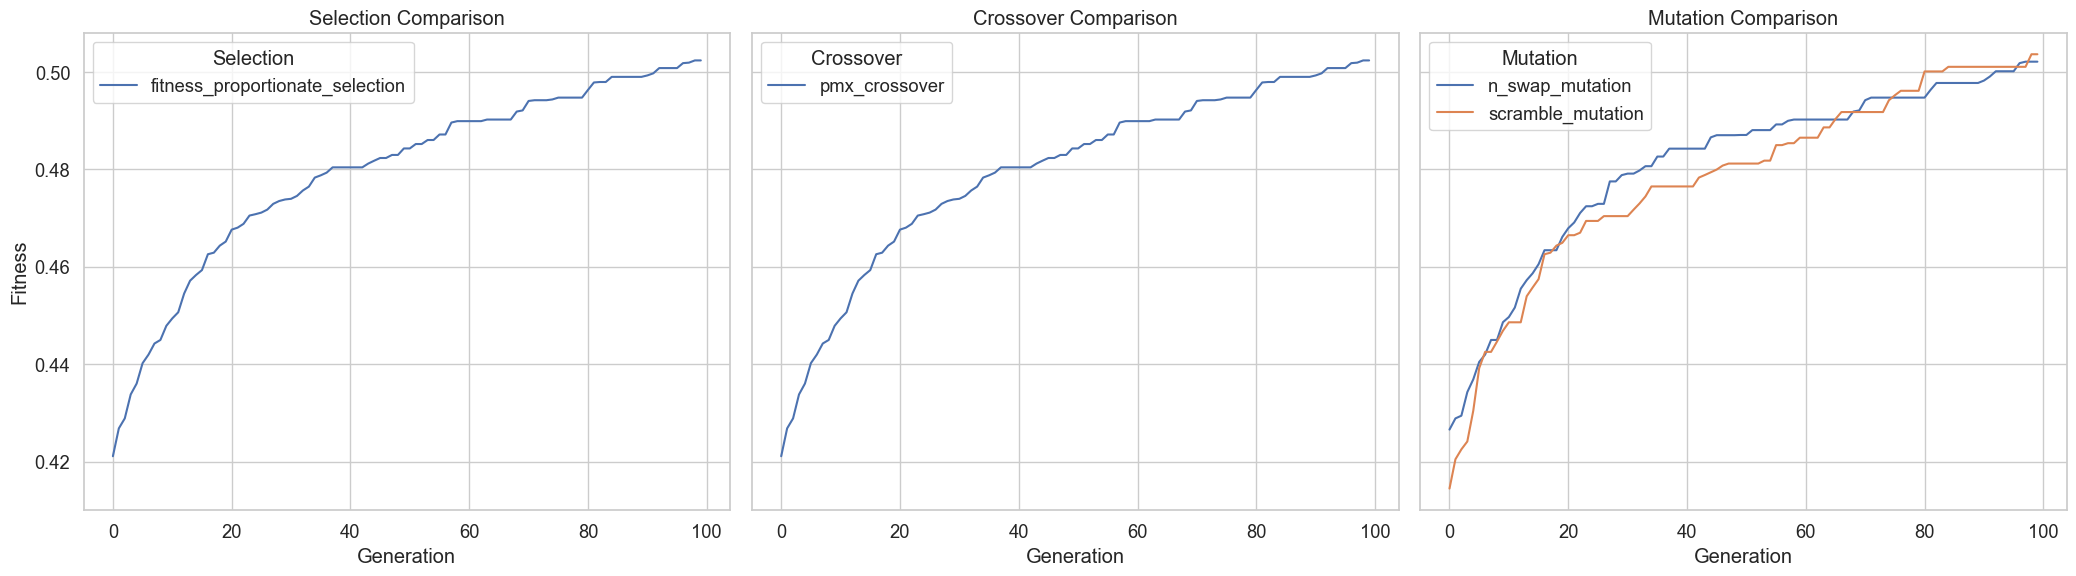

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6), sharey=True)

# Plot selection results
for name, df in selection_fit_dfs.items():
    mean_fitness = df.median(axis=0)
    axes[0].plot(mean_fitness.index, mean_fitness.values, label=name)

axes[0].set_title("Selection Comparison")
axes[0].set_xlabel("Generation")
axes[0].set_ylabel("Fitness")
axes[0].legend(title="Selection")
axes[0].grid(True)

# Plot crossover results
for name, df in crossover_fit_dfs.items():
    mean_fitness = df.median(axis=0)
    axes[1].plot(mean_fitness.index, mean_fitness.values, label=name)

axes[1].set_title("Crossover Comparison")
axes[1].set_xlabel("Generation")
axes[1].legend(title="Crossover")
axes[1].grid(True)

# Plot mutation results
for name, df in mutation_fit_dfs.items():
    mean_fitness = df.median(axis=0)
    axes[2].plot(mean_fitness.index, mean_fitness.values, label=name)

axes[2].set_title("Mutation Comparison")
axes[2].set_xlabel("Generation")
axes[2].legend(title="Mutation")
axes[2].grid(True)

plt.tight_layout()
plt.show()

## Approach 2 - Aggregate by Configuration

First calculate the median result for each configuration, and then take the median of those medians for the ones sharing the same hyperparameter value.

In [81]:
selection_medians = {k: [] for k in selection_names}
crossover_medians = {k: [] for k in crossover_names}
mutation_medians = {k: [] for k in mutation_names}

for df_name, df in fitness_dfs.items():
    for selection_name in selection_names:
        if selection_name in df_name:
            # Calculate median best fitness over generations for configuration using this selection
            selection_medians[selection_name].append(df.median(axis=0).values)
    for crossover_name in crossover_names:
        if crossover_name in df_name:
            # Calculate median best fitness over generations for configuration using this crossover
            crossover_medians[crossover_name].append(df.median(axis=0).values)
    for mutation_name in mutation_names:
        if mutation_name in df_name:
            # Calculate median best fitness over generations for configuration using this mutation
            mutation_medians[mutation_name].append(df.median(axis=0).values)

# Final median curves: median of medians across configurations
selection_curves = {k: np.median(v, axis=0) for k, v in selection_medians.items() if v}
crossover_curves = {k: np.median(v, axis=0) for k, v in crossover_medians.items() if v}
mutation_curves = {k: np.median(v, axis=0) for k, v in mutation_medians.items() if v}

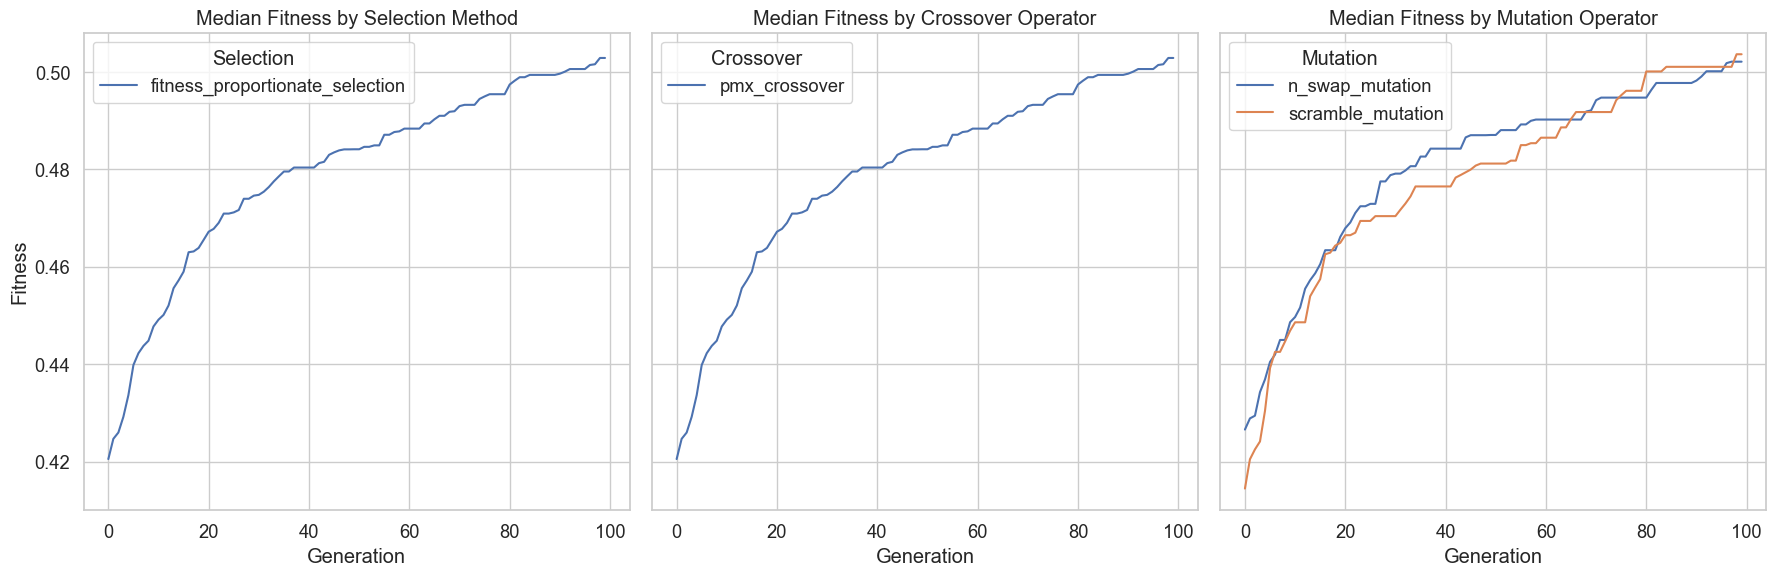

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot selection
for name, curve in selection_curves.items():
    axes[0].plot(range(len(curve)), curve, label=name)
axes[0].set_title("Median Fitness by Selection Method")
axes[0].set_xlabel("Generation")
axes[0].set_ylabel("Fitness")
axes[0].legend(title="Selection")
axes[0].grid(True)

# Plot crossover
for name, curve in crossover_curves.items():
    axes[1].plot(range(len(curve)), curve, label=name)
axes[1].set_title("Median Fitness by Crossover Operator")
axes[1].set_xlabel("Generation")
axes[1].legend(title="Crossover")
axes[1].grid(True)

# Plot mutation
for name, curve in mutation_curves.items():
    axes[2].plot(range(len(curve)), curve, label=name)
axes[2].set_title("Median Fitness by Mutation Operator")
axes[2].set_xlabel("Generation")
axes[2].legend(title="Mutation")
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Wilcoxon Test

In [83]:
# Best configs
best_configs = [
    'fitness_proportionate_selection_pmx_crossover_n_swap_mutation',
    'fitness_proportionate_selection_pmx_crossover_scramble_mutation',
    ]

In [84]:
# Collect final generation fitness for each config
final_gen_fitness = {
    name: df.iloc[:, -1].values  # Last column = final generation
    for name, df in fitness_dfs.items()
    if name in best_configs
}

# Initialize p-value DataFrame
p_values_df = pd.DataFrame(index=best_configs, columns=best_configs)

# Fill in p-values from Wilcoxon test
for (cfg1, cfg2) in combinations(best_configs, 2):
    stat, p = wilcoxon(final_gen_fitness[cfg1][:18], final_gen_fitness[cfg2])
    p_values_df.loc[cfg1, cfg2] = p
    p_values_df.loc[cfg2, cfg1] = p

# Diagonal should be 1.0 (self-comparison)
for cfg in best_configs:
    p_values_df.loc[cfg, cfg] = 1.0

# Convert to float
p_values_df = p_values_df.astype(float)

# Show results
print("Wilcoxon p-values matrix (α = 0.05):")
display(p_values_df)

# Highlight significant differences
significant = p_values_df < 0.05
print("\nSignificant differences (True = p < 0.05):")
display(significant)

Wilcoxon p-values matrix (α = 0.05):


,fitness_proportionate_selection_pmx_crossover_n_swap_mutation,fitness_proportionate_selection_pmx_crossover_scramble_mutation
fitness_proportionate_selection_pmx_crossover_n_swap_mutation,1.000000,0.898575
fitness_proportionate_selection_pmx_crossover_scramble_mutation,0.898575,1.000000



Significant differences (True = p < 0.05):


,fitness_proportionate_selection_pmx_crossover_n_swap_mutation,fitness_proportionate_selection_pmx_crossover_scramble_mutation
fitness_proportionate_selection_pmx_crossover_n_swap_mutation,False,False
fitness_proportionate_selection_pmx_crossover_scramble_mutation,False,False


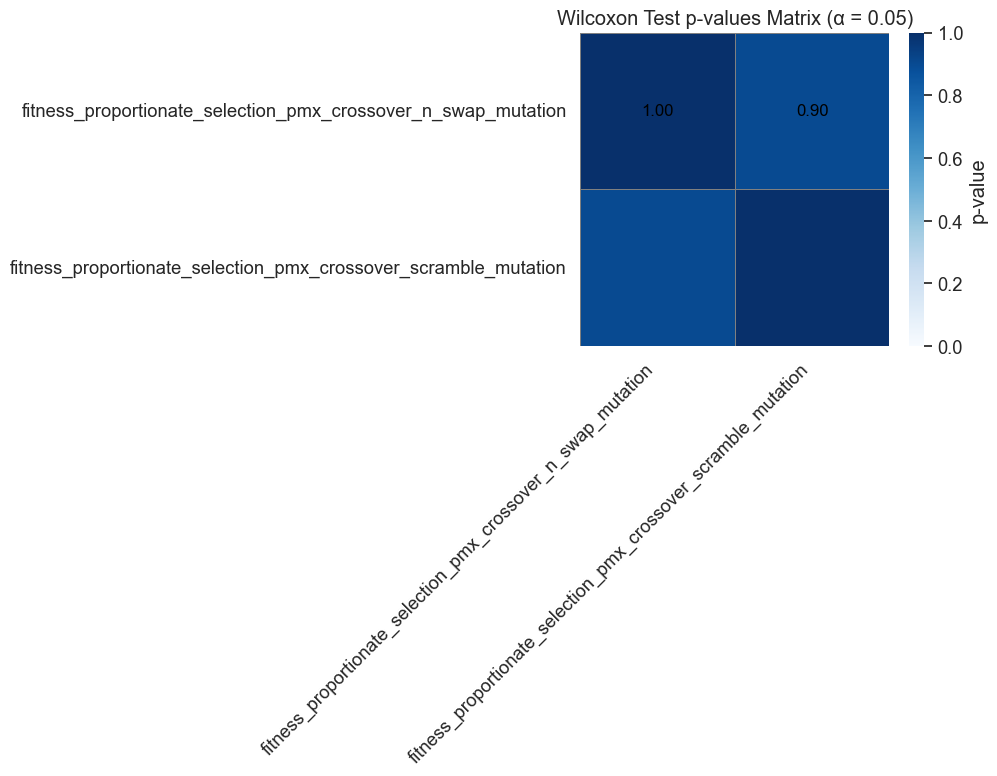

In [85]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    p_values_df,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    vmin=0,
    vmax=1,
    cbar_kws={'label': 'p-value'},
    linewidths=0.5,
    linecolor='gray',
    annot_kws={"size": 12, "color": "black"}
)

plt.title("Wilcoxon Test p-values Matrix (α = 0.05)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Comparing Algorithms

In [ ]:
initial_solution = Individual(
    mutation_function=n_swap_mutation,
    crossover_function=pmx_crossover
)

In [ ]:
POP_SIZE = 50

hc_best_fitnesses = []
sa_best_fitnesses =[]
ga_best_fitnesses = []

for run_nr in range(30):
    hc_best_solution = hill_climbing(
        initial_solution=initial_solution,
        maximization=False
    )
    sa_best_solution = simulated_annealing(
        initial_solution=initial_solution,
        maximization=False,
        C=1,
        L=10,
        H=0.1,
        max_iter=100
    )
    ga_best_solution, _ = genetic_algorithm(
        initial_solution,
        max_gen=100,
        selection_algorithm=fitness_proportionate_selection,
        xo_prob=0.8,
        mut_prob=0.9,
        elitism=True
    )

    hc_best_fitnesses.append(hc_best_solution.fitness())
    sa_best_fitnesses.append(sa_best_solution.fitness())
    ga_best_fitnesses.append(ga_best_solution.fitness())

In [ ]:
# Create a DataFrame in long format
df = pd.DataFrame({
    'value': hc_best_fitnesses + sa_best_fitnesses + ga_best_fitnesses,
    'group': ['HC'] * len(hc_best_fitnesses) + ['SA'] * len(sa_best_fitnesses) + ['GA'] * len(ga_best_fitnesses)
})

# Set a beautiful theme
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.2)

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='group', y='value', data=df, width=0.5, linewidth=2.5, fliersize=4)

# Titles and labels
plt.title('Comparison of HC, SA and GA')
plt.xlabel('Algorithms')
plt.ylabel('Fitness of best found individual')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()